# [geo_data] - Joindre les deux données pour la dataviz

## 1 - Import des modules

In [21]:
import pandas as pd
import geopandas as gpd
import contextily as ctx
import matplotlib.pyplot as plt
from shapely.geometry import Point, shape

## 2 - Import du jeux de données

In [22]:
url_contour_geo = "https://france-geojson.gregoiredavid.fr/repo/departements.geojson"
sapin_data  = pd.read_csv("Documents/geoDataScience/defi_carto_sapin_2024/data/cleaned_sapin_data.csv")
contour_geo = gpd.read_file(url_contour_geo)

In [23]:
contour_geo.sort_values(by="code", ascending=True).head()

,code,nom,geometry
68,01,Ain,"POLYGON ((4.78021 46.17668, 4.78024 46.18905, ..."
0,02,Aisne,"POLYGON ((3.1727 50.012, 3.1822 50.01234, 3.21..."
45,03,Allier,"POLYGON ((3.03206 46.79491, 3.03684 46.7844, 3..."
20,04,Alpes-de-Haute-Provence,"POLYGON ((5.67604 44.19143, 5.69209 44.18648, ..."
21,05,Hautes-Alpes,"POLYGON ((6.26057 45.12684, 6.2755 45.1153, 6...."


## 3 - Jointure des données

In [24]:
contour_geo = contour_geo.merge(sapin_data, left_on="code", right_on="dep-code-txt", how="inner")
contour_geo = contour_geo.drop(columns=["nom", "code"], axis=1)
contour_geo.head()

,geometry,dep-code-txt,dep-nom,sapin-nb-exploitation,sapin-nb-hectare,total-nb-expl,total-nb-ha,region_name,sapin-nb-exploitation-is-null,sapin-nb-hectare-is-null,total-nb-ha-is-null
0,"POLYGON ((3.1727 50.012, 3.1822 50.01234, 3.21...",02,Aisne,19.0,23.0,4413,493926.0,Hauts-de-France,False,False,False
1,"POLYGON ((3.41479 48.39027, 3.42208 48.41334, ...",10,Aube,43.0,31.0,4846,374685.0,Grand Est,False,False,False
2,"POLYGON ((-1.11962 49.35557, -1.11503 49.3624,...",14,Calvados,38.0,297.0,5181,372938.0,Normandie,False,False,False
3,"POLYGON ((2.50841 45.4785, 2.52444 45.4807, 2....",15,Cantal,35.0,5.0,4632,341054.0,Auvergne-Rhône-Alpes,False,False,False
4,"POLYGON ((0.81482 48.67016, 0.82767 48.68072, ...",28,Eure-et-Loir,60.0,129.0,3564,446392.0,Centre-Val de Loire,False,False,False


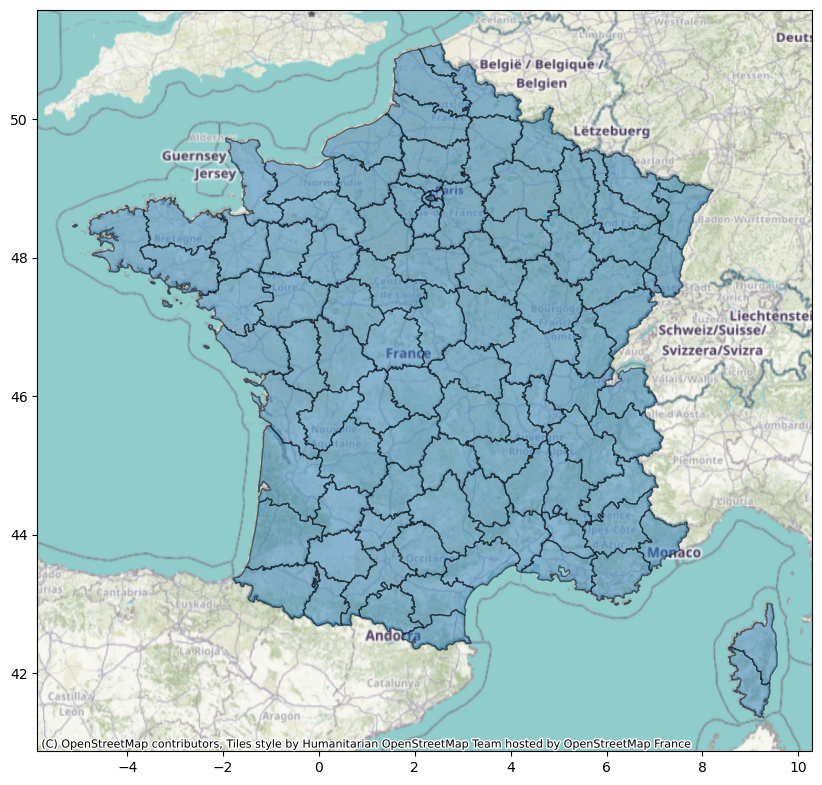

In [25]:
# Vérification de la jointure
fig, ax = plt.subplots(figsize=(10, 10))
contour_geo.plot(ax=ax, alpha=0.5, edgecolor='k')
_ = ctx.add_basemap(ax, crs=contour_geo.crs.to_string())
plt.show()

## 4 - Export des données

In [26]:
with open("Documents/geoDataScience/defi_carto_sapin_2024/data/data_sapin.geojson" , "w") as file:
    file.write(contour_geo.to_json(drop_id=True))

-- END -- 